# Practica 07
Hernández Navarro Armando

## K-Means
Usando K-menas:
- Para k = 1, ... 10. Calcula el wcss para cada k y graficalos
- Justifica qué valor de k sería el mas optimo
- Obtén las diferentes clases de vinos

In [1]:
# Importamos los paquetes necesarios
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Cargamos el dataset de vinos
wines = pd.read_csv('/content/wine.csv')
wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


[[  14.23    1.71    2.43 ...    3.92 1065.      0.  ]
 [  13.2     1.78    2.14 ...    3.4  1050.      0.  ]
 [  13.16    2.36    2.67 ...    3.17 1185.      0.  ]
 ...
 [  13.27    4.28    2.26 ...    1.56  835.      2.  ]
 [  13.17    2.59    2.37 ...    1.62  840.      2.  ]
 [  14.13    4.1     2.74 ...    1.6   560.      2.  ]]
(178, 14)
(178, 14)


Text(0, 0.5, 'Color')

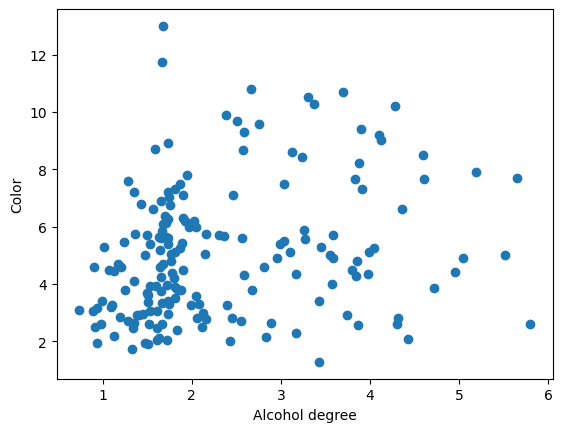

In [3]:
#Obtenemos los valores y graficamos....
X = wines.values
print(wines.values)
print(X.shape)
print(wines.shape)
#Creamos una grafica de ejemplo entre el grado de alcohol y el color. Solo para ejemplo debido a las diemnsiones
plt.scatter(X[:, 1], X[:,-5])
plt.xlabel('Alcohol degree')
plt.ylabel('Color')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

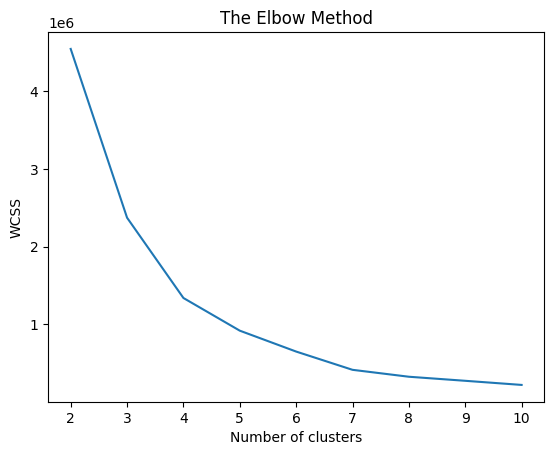

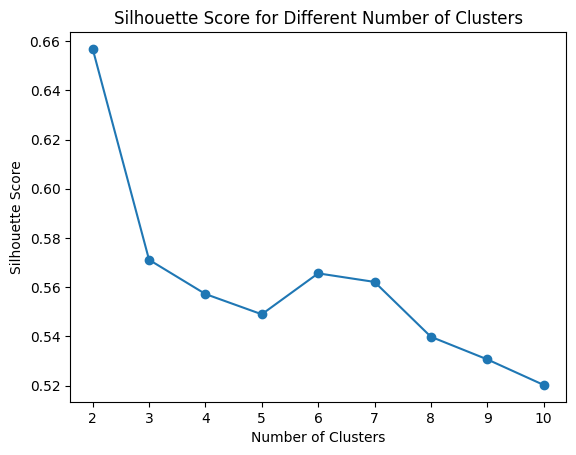

In [4]:
#Entrenamos K-Means y vamos guardando los resultados de los clusters para wcss
wcss = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #WCSS o SSE
plt.show()

plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [5]:
# Por lo que vemos en la grafica de wcss, el número de clusters ideal es 4
# Usamos k-means con 4 clusters y obtenemos los clusters resultantes
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Motramos cada entraada junto con el cluster al que pertenecen
wines['cluster'] = y_kmeans.tolist()
display(wines.sort_values(by=['cluster']))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1,0
91,12.00,1.51,2.42,22.0,86.0,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450.0,1,0
90,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1,0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515.0,2,0
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270.0,0,3
53,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0,0,3
52,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0,0,3
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0,0,3


Ya que tenemos multiples dimensiones, no podemos graficar los clusters, pero mostramos el conjunto de datos junto a que cluster pertenece

In [6]:
# Mostramos cada clase de vino
print('Clase 0')
display(wines.loc[wines['cluster'] == 0])

print('Clase 1')
display(wines.loc[wines['cluster'] == 1])

print('Clase 2')
display(wines.loc[wines['cluster'] == 2])

print('Clase 3')
display(wines.loc[wines['cluster'] == 3])



Clase 0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.950000,1.05,1.82,520.0,1,0
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.750000,0.98,1.59,450.0,1,0
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.450000,1.22,2.87,420.0,1,0
64,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.950000,1.45,2.23,355.0,1,0
66,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.300000,1.12,3.18,502.0,1,0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.680000,1.12,3.48,510.0,1,0
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.380000,1.36,3.16,410.0,1,0
72,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.740000,0.98,2.78,472.0,1,0
75,11.66,1.88,1.92,16.0,97.0,1.61,1.57,0.34,1.15,3.800000,1.23,2.14,428.0,1,0
76,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.600000,1.19,2.48,392.0,1,0


Clase 1


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.040,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.050,3.40,1050.0,0,1
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.080,2.85,1045.0,0,1
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.010,3.55,1045.0,0,1
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.250,2.73,1150.0,0,1
17,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.130,2.57,1130.0,0,1
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.960,3.36,845.0,0,1
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.110,4.00,1035.0,0,1
23,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.090,3.63,1015.0,0,1
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.120,3.82,845.0,0,1


Clase 2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2
20,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0,0,2
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,0,2
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0,2
39,14.22,3.99,2.51,13.2,128.0,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760.0,0,2
40,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0,0,2
43,13.24,3.98,2.29,17.5,103.0,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680.0,0,2
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1,2
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1,2
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0,1,2


Clase 3


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,3
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,3
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,3
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,3
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,3
10,14.10,2.16,2.30,18.0,105.0,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510.0,0,3
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0,0,3
12,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320.0,0,3
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0,0,3
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0,0,3


## Clusters.csv
Usando el archivo clusters.csv realiza:
- Utiliza Hierarchival clustering, K-Means, DBSCAN y GaussianMixture para obtener lso diferentes clusters
- Usilliza al menso tres formas de evaluar los reslutados de los algoritmos utilizados
- Prueba diferentes hiperparámetros en cada uno de los modelos y reporta aquellos que produzcan los mejores resultados
- ¿Cuál es el número óptimo de clusters para este conjunto de datos?
- Compara los resultados entre los diferentes algoritmos ¿Cuál es el mejojr para clasificar este conjunto de datos?

,x,y
0,0.816729,1.327191
1,0.286716,1.304853
2,2.087953,0.025302
3,0.418027,1.034951
4,1.230035,-0.127041
...,...,...
3245,4.343430,6.717349
3246,-4.310424,5.162806
3247,4.669646,7.294812
3248,-3.898566,1.252578


Text(0, 0.5, 'Y')

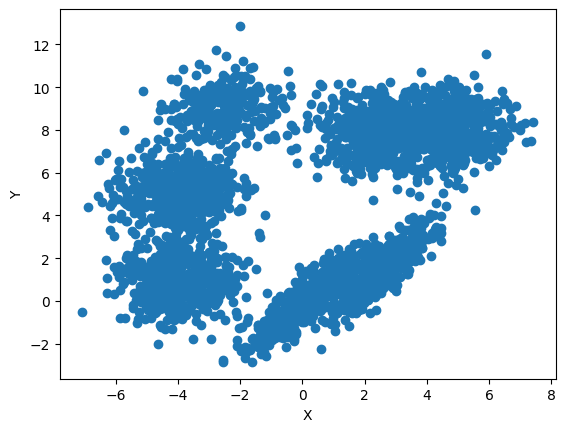

In [7]:
# Importamos los clusters
clusters = pd.read_csv('/content/clusters.csv')

#Obtenemos los valores y graficamos....
X = clusters.values

display(clusters)
#Creamos una grafica de ejemplo entre el grado de alcohol y el color, por ejemplo
plt.scatter(X[:, 0], X[:,1])
plt.xlabel('X')
plt.ylabel('Y')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

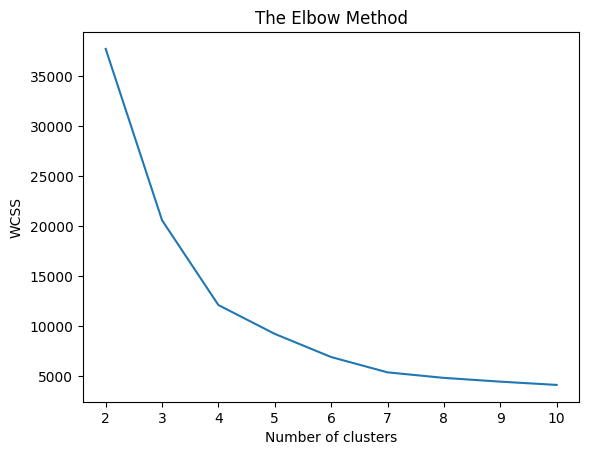

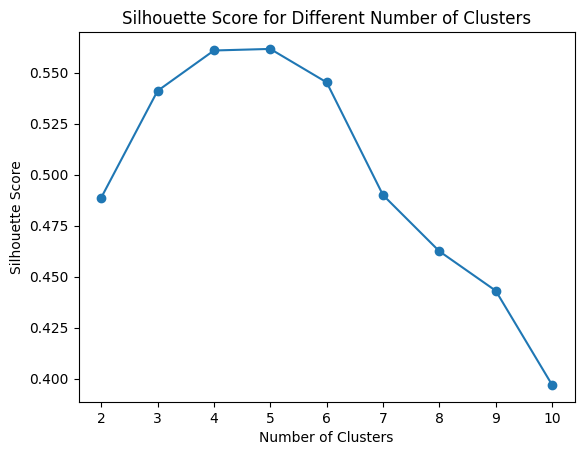

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


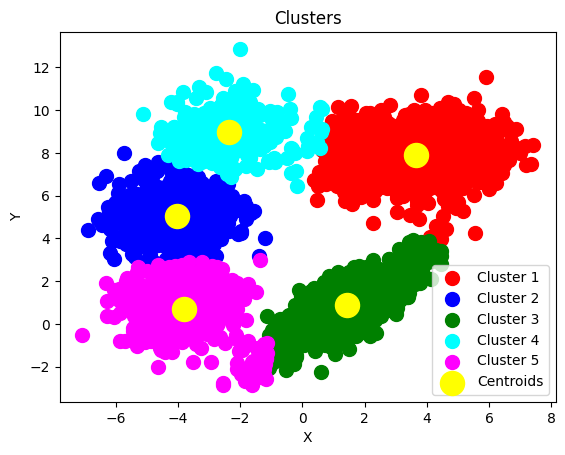

In [8]:
## K-Means
#Entrenamos K-Means y vamos guardando los resultados de los clusters para wcss
wcss = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #WCSS o SSE
plt.show()

plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Por lo que vemos en la grafica de wcss, el número de clusters ideal es 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


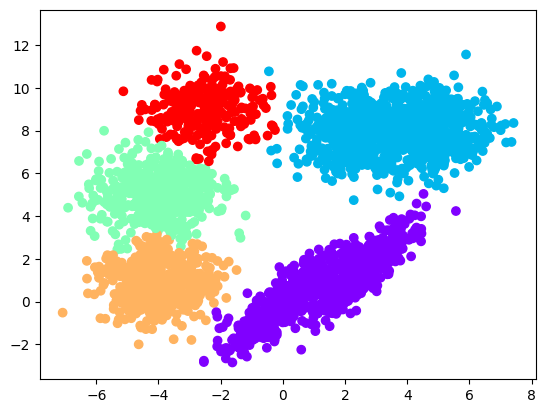

In [9]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering


# Creamos y entrenamos el modelo
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hierarchical_cluster.fit(X)
labels = hierarchical_cluster.labels_
# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.show()


6500


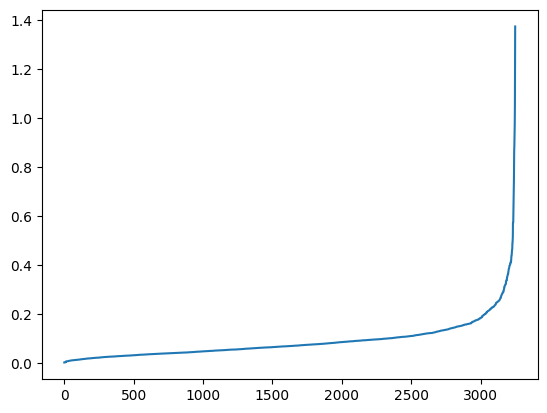

[ 0  0  0 ...  3  5 -1]


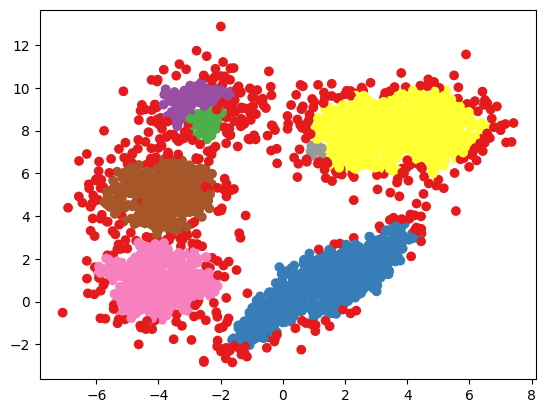

In [13]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

#Exploración de los datos
#knee method
print(X.size)
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

# Creamos y entrenamos el modelo
dbscan_cluster = DBSCAN(eps=0.3, min_samples=9)
dbscan_cluster.fit(X)
labels = dbscan_cluster.labels_
print(labels)
# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1')
plt.show()


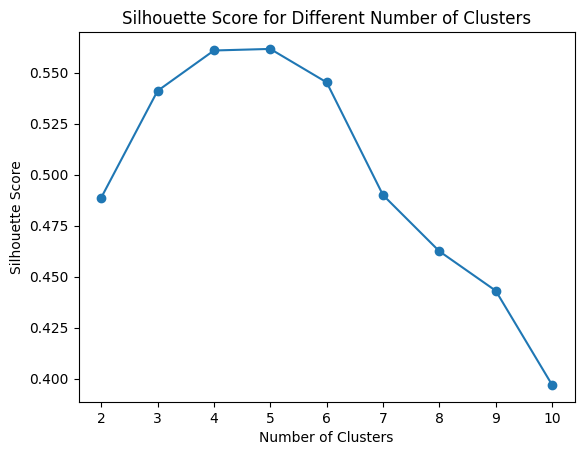

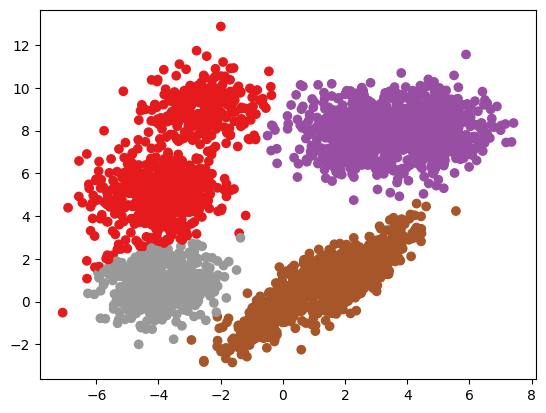

[[-3.61731003  6.08638866]
 [ 3.56048398  7.95997333]
 [ 1.31161102  0.7778738 ]
 [-3.92093261  0.8840919 ]]
[[[1.49770743 1.58878178]
  [1.58878178 5.50097369]]

 [[2.3378354  0.07227521]
  [0.07227521 0.97338582]]

 [[2.30605954 1.66026113]
  [1.66026113 1.68048303]]

 [[0.78938688 0.0942958 ]
  [0.0942958  0.88915189]]]


In [11]:
#GaussianMixture
from sklearn.mixture import GaussianMixture



# Como vimos previamente usando silhouette scores, el numero ideal es entre 4 y 5
# Probamos ambos y creemos que funciona mejor con 4
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

gm = GaussianMixture(n_components=4, covariance_type='full', random_state=0)
gm.fit(X)
labels = gm.predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1')
plt.show()
print(gm.means_)
print(gm.covariances_)


## Comparación de resultados para clusters.csv
Se realizo primero k-means para sacar "the knee method" y "silhouette score"
### ¿Cuál es el número optimo de clusters para este conjunto de datos?

- K-Means:Se usa el metodo "the knee method" y "silhouette score" basado en k-means. Se obtuvo que el número ideal de clusters esta entre 4 o 5, por lo que se usaron 5 clusters

- Hierarchical clustering: Ya que sacamos "the knee method" y "silhouette score" basado en k-means, se uso el mismo número de 5 clusters

- DBSCAN: Usamos "the knee method" para encontrar los parametros para epsilon, y realizamos diferentes pruebas para min_samples. Encontramos 5 clusters, sin incluir loa datos que quedaron sin clasificar.

- GaussianMixtuure: Usando la información de "the knee method" y "silhouette score" usamos GaussianMixture

## ¿Cuál es el mejor algoritmo para clasificar este conjunto de datos?
- En la graficación inicial de los datos, podemos ver que el conjunto tiene un gran tamaño y una dispersión clara. Ademas de esto, podemos ver la idea inicial de los que podrian terminar siendo los clusters resultantes de los diferentes algoritmos, y estos cluster aparentan tener formas 'Esfericas'.
- Ya que el conjunto de datos es bidimensional, y con su graficación podemos darnos una idea de los clusters posibles, algoritmos en los cuales podemos definir el número de clusters a encontrar, como k-means o gaussinaMixture, deberian de funcionar bien

Por lo anterior, creemos que k-means es un algoritmo suficientemente bueno para calsificar este conjunto de datos